In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd

In [3]:
import torch as tc
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, models, transforms
import torch.nn.functional as F 
    


In [4]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os,sys

plt.ion()   # interactive mode

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F 
from torch import np
from torch.optim.lr_scheduler import StepLR
import torch.utils.data as data_utils


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd

import torch as tc
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, models, transforms
import torch.nn.functional as F 
    


# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os,sys

plt.ion()   # interactive mode

import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F 
from torch import np
from torch.optim.lr_scheduler import StepLR
import torch.utils.data as data_utils


In [7]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os,sys## Criando versão Naive de um Custom Dataset


## Criando versão Naive de um Custom Dataset

In [8]:
# Data augmentation and normalization for training 
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

## Define a variável da GPU

In [9]:
use_gpu = tc.cuda.is_available()

## Loading the data

In [10]:
data = np.load('/data/datasets/cifar10-redux.npz')

print('==> Preparing data..')
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=False)
print(type(trainset))

In [14]:
n_samples = data['X_train'].shape[0]
print(n_samples)

2000


In [26]:
percentage = 0.8

In [27]:
data_train=data['X_train'][:int(n_samples*percentage)]


In [28]:
print(type(data_train))
print(data_train.shape)

<class 'numpy.ndarray'>
(1600, 3, 32, 32)


In [20]:
percentage = 0.8

In [21]:
new_data = data_train[:int(n_samples*percentage)]

In [22]:
print(len(new_data))
print(type(new_data))

1600
<class 'numpy.ndarray'>


In [12]:
few_samples = False
if few_samples:
    n_samples = 200
else:
    n_samples = data['X_train'].shape[0]

In [13]:
p=0.8

In [14]:
print(n_samples*p)
print(int(n_samples*p))

1600.0
1600


In [15]:
X_train = data['X_train'][:int(n_samples*p)]
y_train = data['y_train'][:int(n_samples*p)]
X_val = data['X_train'][int(n_samples*p):int(n_samples*(1+(1-p)))]
y_val = data['y_train'][int(n_samples*p):int(n_samples*(1+(1-p)))]

X_test = data['X_test'][:int(n_samples*p)]
y_test = data['y_test'][:int(n_samples*p)]

## Números de classes.

5 = Cachorro

4 = Cervo

3 = Gato



Passando [3,5,5] para [0,1,2]

In [44]:
y_train = y_train - y_train.min()
y_val =  y_val - y_val.min()
y_test = y_test - y_test.min()

In [84]:
classes = ('cat','deer','dog')

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1600, 3, 32, 32), (1600,), (500, 3, 32, 32), (500,))

Vendo número de classes em cada dataset

In [82]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)
unique_val, counts_val = np.unique(y_val, return_counts=True)


In [83]:
print(unique_train,counts_train)
print(unique_test,counts_test)
print(unique_val,counts_val)

[0 1 2] [524 555 521]
[0 1 2] [173 173 154]
[0 1 2] [137 137 126]


Como pode ser notado, está bem balanceado.

In [91]:
print(type(unique_val))
print(type(classes))

<class 'numpy.ndarray'>
<class 'tuple'>


In [97]:
print(classes[i] for i in unique_val)

<generator object <genexpr> at 0x7feb594f7a40>


In [89]:
print(classes[unique_val])

TypeError: only integer arrays with one element can be converted to an index

In [68]:
print(y_train[:10])
print(np.argsort(y_train))

[1 0 1 0 1 0 0 2 1 0]
[1599 1219 1220 ..., 1113  506  799]


In [75]:
j=0
for i,idx in enumerate(np.argsort(y_train)):
   # print(i,y_train[idx])
    if (y_train[idx] == 1):
        print(idx)
        print(i)
        break

1010
524


In [77]:
print(y_train[524])

1


## Passando os dados para tensores

In [47]:
X_train_tensor = tc.from_numpy(X_train).type(tc.FloatTensor)
y_train_tensor = tc.from_numpy(y_train).type(tc.LongTensor)
X_val_tensor = tc.from_numpy(X_val).type(tc.FloatTensor)
y_val_tensor = tc.from_numpy(y_val).type(tc.LongTensor)
X_test_tensor = tc.from_numpy(X_test).type(tc.FloatTensor)
y_test_tensor = tc.from_numpy(y_test).type(tc.LongTensor)

In [48]:
print('X_train.shape',X_train_tensor.size(), 'X_train.type',X_train_tensor.type())
print('y_train.shape',y_train_tensor.size(), 'y_train.type',y_train_tensor.type())
print('X_val.shape',X_val_tensor.size(), 'X_val.type',X_val_tensor.type())
print('y_val.shape',y_val_tensor.size(), 'y_val.type',y_val_tensor.type())

print('X_test.shape',X_test_tensor.size(), 'X_test.type',X_test_tensor.type())
print('y_test.shape',y_test_tensor.size(), 'y_test.type',y_test_tensor.type())

X_train.shape torch.Size([1600, 3, 32, 32]) X_train.type torch.FloatTensor
y_train.shape torch.Size([1600]) y_train.type torch.LongTensor
X_val.shape torch.Size([400, 3, 32, 32]) X_val.type torch.FloatTensor
y_val.shape torch.Size([400]) y_val.type torch.LongTensor
X_test.shape torch.Size([500, 3, 32, 32]) X_test.type torch.FloatTensor
y_test.shape torch.Size([500]) y_test.type torch.LongTensor


In [49]:
teste = X_train_tensor.numpy()

In [50]:
print(X_train[0].dtype)

uint8


In [51]:
print(teste[0].dtype)

float32


In [52]:
teste = teste.astype('uint8')

In [53]:
print(teste[0].dtype)

uint8


## Transformando os numpy em images

<class 'numpy.ndarray'>


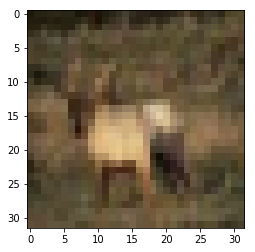

In [54]:
plt.figure()
image=X_train[0]
print(type(image))
image = image.reshape(3,32,32).transpose((1,2,0))
plt.imshow(image)
#plt.imshow(image.reshape(3,32,32).transpose((1,2,0)))

In [55]:
from PIL import Image
im = Image.fromarray(image)
im.save('myimg.jpeg')

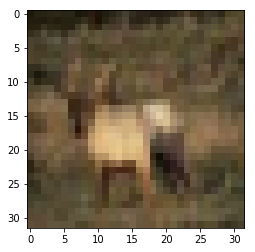

In [56]:
plt.figure()
plt.imshow(im)

In [57]:
!ls

93%.ipynb				     my_cifar_redux_pytorch.ipynb
Creating_dataset.ipynb			     myimg.jpeg
data					     test.ipynb
data_loading_tutorial.ipynb		     tmp
my_cifar_redux_pytorch-Copy1.ipynb	     transfer_learning_tutorial.ipynb
my_cifar_redux_pytorch-fixingfunction.ipynb  your_file.jpeg


In [58]:
os.makedirs('tmp',exist_ok=False)

FileExistsError: [Errno 17] File exists: 'tmp'

In [59]:
!rm -r tmp

In [60]:
print(os.path.isdir('./tmp'))


False


In [61]:
!ls

93%.ipynb				     my_cifar_redux_pytorch.ipynb
Creating_dataset.ipynb			     myimg.jpeg
data					     test.ipynb
data_loading_tutorial.ipynb		     transfer_learning_tutorial.ipynb
my_cifar_redux_pytorch-Copy1.ipynb	     your_file.jpeg
my_cifar_redux_pytorch-fixingfunction.ipynb


def creating_images(arrays,directory):
    
    #Test if the directory exists
    if (not os.path.isdir('./tmp')):
        print("Directory doesn't exist")
        print("Creating directory")
        os.makedirs('tmp',exist_ok=False)
    else:    
        print("Directory already exists")
    for i,sample in enumerate(arrays):
        if (i==10):
            break
        print(i)
        print('image'+str(i)+'.jṕg')
        sample = sample.reshape(3,32,32).transpose((1,2,0))
        print(sample.shape)
        img = Image.fromarray(sample)
        img.save(directory +'/'+'image'+str(i)+'.jpg')
creating_images(X_train,'tmp')

In [62]:
!rm -r tmp/

rm: cannot remove 'tmp/': No such file or directory


In [123]:
def creating_images(arrays,directory):
    #Test if the directory exists

    if (not os.path.isdir(directory)):
        print("Directory doesn't exist")
        print("Creating directory")
        os.makedirs(directory,exist_ok=False)
    else:    
        print("Directory already exists")
        if (arrays.shape[0] == len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])):
            print("Becareful, there is already",arrays.shape[0],'files in the directory')
            return (-1)
    for i,sample in enumerate(arrays):
        sample = sample.reshape(3,32,32).transpose((1,2,0))
        img = Image.fromarray(sample)
        img.save(directory +'/'+'image'+str(i)+'.jpg')
    
    if (arrays.shape[0] == len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])):
        print("Done with saving images")


In [117]:
base_dir = './data/cifar-redux/'

In [118]:
!ls ./data/

cifar-10-batches-py  cifar-10-python.tar.gz


In [ ]:
train_idx = np.argwhere(y_train == 0)

In [119]:
#print(train_idx.shape)
print(base_dir+'train/'+str(classes[0]))
#creating_images(X_train[train_idx],base_dir+'train')

./data/cifar-redux/train/cat


In [124]:
num_class = 0
train_idx = np.argwhere(y_train == num_class)
creating_images(X_train[train_idx],base_dir+'train/'+str(classes[num_class]))

Directory doesn't exist
Creating directory
Done with saving images


In [125]:
num_class = 1
train_idx = np.argwhere(y_train == num_class)
creating_images(X_train[train_idx],base_dir+'train/'+str(classes[num_class]))

Directory doesn't exist
Creating directory
Done with saving images


In [126]:
num_class = 2
train_idx = np.argwhere(y_train == num_class)
creating_images(X_train[train_idx],base_dir+'train/'+str(classes[num_class]))

Directory doesn't exist
Creating directory
Done with saving images


In [127]:
num_class = 0
val_idx = np.argwhere(y_val == num_class)
creating_images(X_val[val_idx],base_dir+'val/'+str(classes[num_class]))

Directory doesn't exist
Creating directory
Done with saving images


In [128]:
num_class = 1
val_idx = np.argwhere(y_val == num_class)
creating_images(X_val[val_idx],base_dir+'val/'+str(classes[num_class]))

Directory doesn't exist
Creating directory
Done with saving images


In [129]:
num_class = 2
val_idx = np.argwhere(y_val == num_class)
creating_images(X_val[val_idx],base_dir+'val/'+str(classes[num_class]))

Directory doesn't exist
Creating directory
Done with saving images


In [130]:
num_class = 0
test_idx = np.argwhere(y_test == num_class)
creating_images(X_test[test_idx],base_dir+'test/'+str(classes[num_class]))

Directory doesn't exist
Creating directory
Done with saving images


In [131]:
num_class = 1
test_idx = np.argwhere(y_test == num_class)
creating_images(X_test[test_idx],base_dir+'test/'+str(classes[num_class]))

Directory doesn't exist
Creating directory
Done with saving images


In [132]:
num_class = 2
test_idx = np.argwhere(y_test == num_class)
creating_images(X_test[test_idx],base_dir+'test/'+str(classes[num_class]))

Directory doesn't exist
Creating directory
Done with saving images


In [105]:
x = np.array([2,2,2,2,2,2,2,2,2,1,0,0,0,0,0,1,1,1,1,1])
print(x.shape)
a = x[x==2]
print (a)

(20,)
[2 2 2 2 2 2 2 2 2]


In [106]:
b = np.argwhere(x == 1)
print(b.shape)


(6, 1)


In [ ]:
creating_images(X_train,'tmp')

In [36]:
import os, os.path

DIR = 'tmp/'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))


1600


In [35]:
!ls

93%.ipynb				     my_cifar_redux_pytorch.ipynb
Creating_dataset.ipynb			     myimg.jpeg
data					     test.ipynb
data_loading_tutorial.ipynb		     tmp
my_cifar_redux_pytorch-Copy1.ipynb	     transfer_learning_tutorial.ipynb
my_cifar_redux_pytorch-fixingfunction.ipynb  your_file.jpeg


In [ ]:
img.save('myimg.jpeg')

In [80]:
image.shape

(32, 32, 3)

In [81]:
im = Image.fromarray(image.reshape(3,32,32))

TypeError: Cannot handle this data type

<class 'numpy.ndarray'>


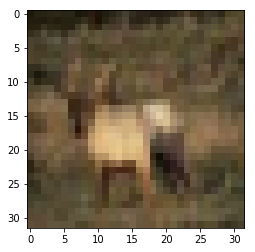

In [108]:
plt.figure()
#image=X_train_tensor[0].numpy()
image = teste[0]
print(type(image))
plt.imshow(image.reshape(3,32,32).transpose((1,2,0)))

In [66]:
image2=X_train_tensor[0].numpy()

In [71]:
print(image2.shape)

(3, 32, 32)


In [72]:
print(X_train[0].shape)

(3, 32, 32)


In [62]:
plt.imshow(image.resize_(3,32,32).transpose((1,2,0)))

<class 'torch.FloatTensor'>


TypeError: transpose received an invalid combination of arguments - got (tuple), but expected (int dim0, int dim1)

In [ ]:
plt.figure(figsize=(24, 12))
#for k, i in enumerate(np.random.choice(np.arange(0, len(y_test)), size=(40,))):
for k, i in enumerate(np.random.choice(np.arange(0, len(y_test)), size=(40,))):
    plt.subplot(5, 8, k + 1)
    image = X_test[i]
    plt.imshow(image.reshape(3,32,32).transpose((1,2,0)))

In [46]:
def imshow(inp, title=None):
    "Expects range (3,H,W)"
    """Imshow for Tensor."""
    print(type(inp))
    inp = inp.numpy().transpose((1, 2, 0))
    print(inp.shape)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [47]:
foto = X_train_tensor[0]

In [48]:
print(foto.size())

torch.Size([3, 32, 32])


<class 'torch.FloatTensor'>
(32, 32, 3)


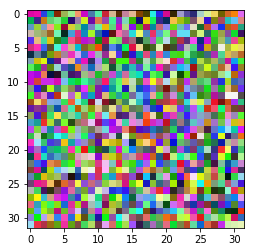

In [49]:
imshow(foto)

In [38]:
from PIL import Image
import numpy as np
rgbArray = np.zeros((512,512,3), 'uint8')
rgbArray[..., 0] = r*256
rgbArray[..., 1] = g*256
rgbArray[..., 2] = b*256
print(rgbArray.shape)

NameError: name 'r' is not defined

In [ ]:
img = Image.fromarray(rgbArray)
img.save('myimg.jpeg')

In [33]:
from PIL import Image
im = Image.fromarray(image)


In [41]:
print(X_train[0].shape)
image = X_train[0]
print(image.shape)
image = image.reshape(32,32,3)
print(image.shape)


(3, 32, 32)
(3, 32, 32)
(32, 32, 3)


In [42]:

im.save("your_file.jpeg")

In [43]:
!ls

93%.ipynb			    my_cifar_redux_pytorch-fixingfunction.ipynb
Creating_dataset.ipynb		    my_cifar_redux_pytorch.ipynb
data				    test.ipynb
data_loading_tutorial.ipynb	    transfer_learning_tutorial.ipynb
my_cifar_redux_pytorch-Copy1.ipynb  your_file.jpeg


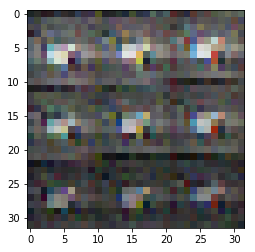

In [46]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(im)
plt.show()

In [44]:
im_show('your_file.jpeg')

NameError: name 'im_show' is not defined